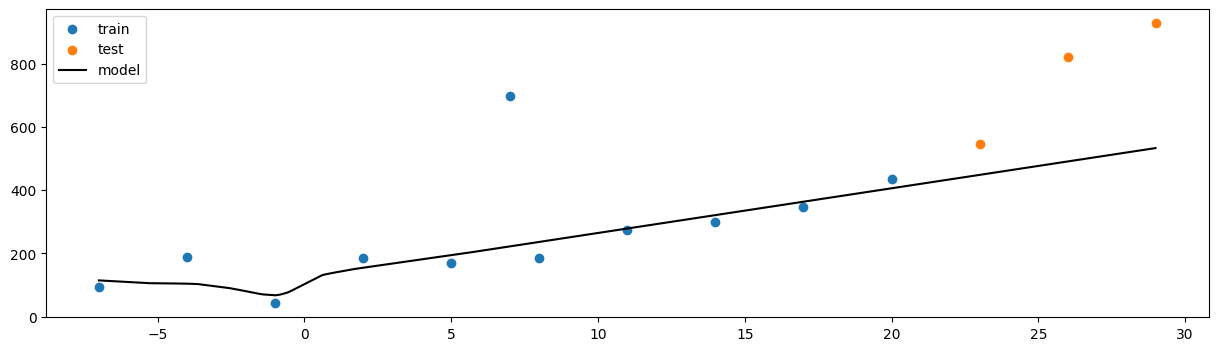

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(5)
X = np.array([-7, -4, -1,  2,  5,7,  8, 11, 14, 17, 20, 23, 26, 29])
y = np.array([ 93, 190,  42, 187, 170,700, 186, 274, 299, 348, 437, 545, 823, 929])
X = tf.reshape(X,(-1,1))



model = tf.keras.Sequential([
    Dense(20,activation='relu', input_shape=(1,)),
    Dense(100,activation='relu'),
    Dense(100,activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.1),loss=tf.keras.losses.mae,metrics=["mae"])

X_train = X[:11]
y_train = y[:11]
X_test = X[11:]
y_test = y[11:]

def train_me(epo=100):
  model.fit(X_train,y_train,epochs=epo,verbose=0)
  y_pred = model.predict(X_test,verbose=0)
  plt.figure(figsize=(15,4))
  plt.scatter(X_train,y_train,label='train')
  plt.scatter(X_test,y_test,label='test')

  xi = tf.constant(np.arange(tf.math.reduce_min(X).numpy(), tf.math.reduce_max(X).numpy(), 0.01))
  xi = tf.reshape(xi,(-1,1))
  y_pred = model.predict(xi,verbose=0)

  plt.plot(xi,y_pred, c='k', label = 'model')
  plt.legend()
  plt.show()

train_me(epo=50)

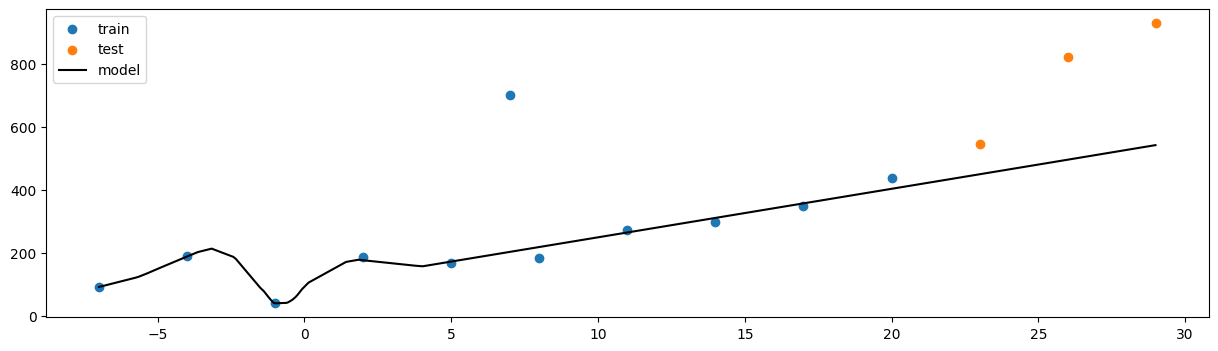

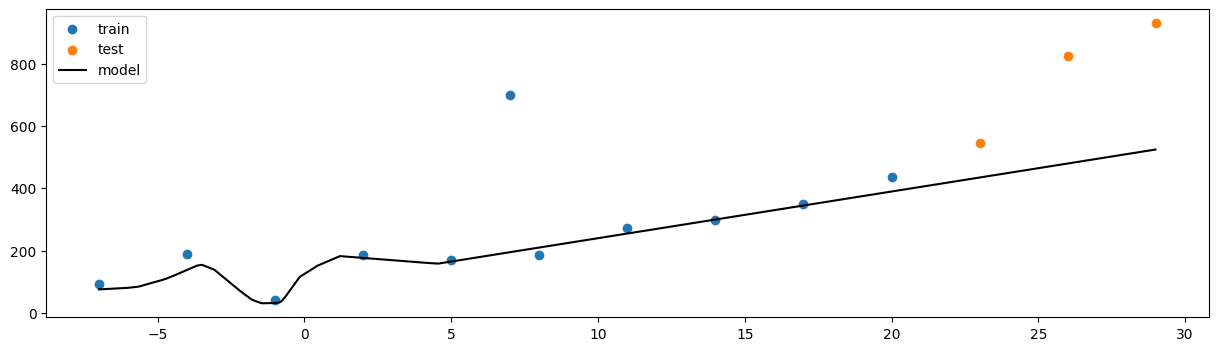

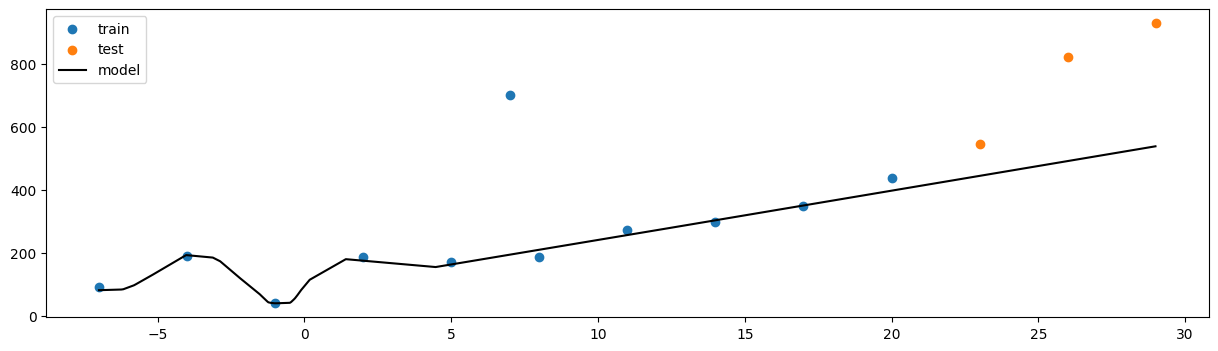

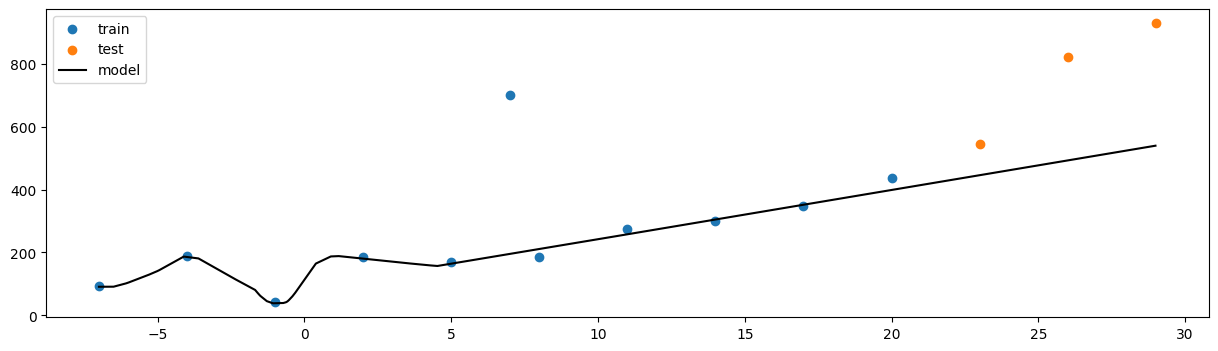

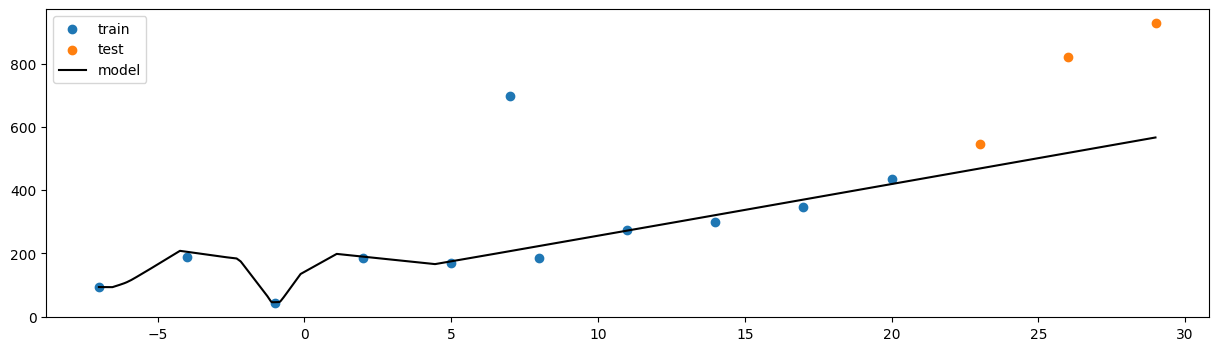

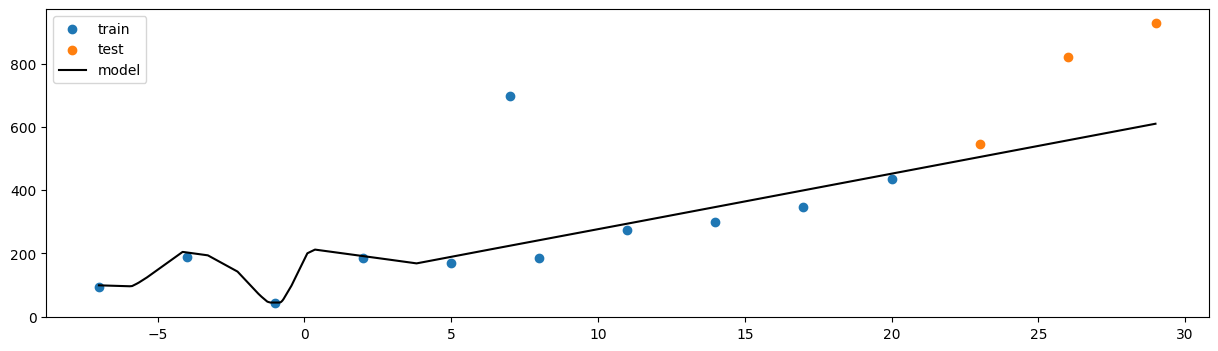

In [3]:
train_me(epo=100)
train_me(epo=100)
train_me(epo=100)
train_me(epo=100)
train_me(epo=100)
train_me(epo=100)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 12341 (48.21 KB)
Trainable params: 12341 (48.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


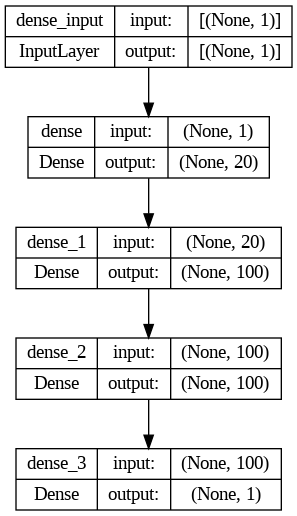

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

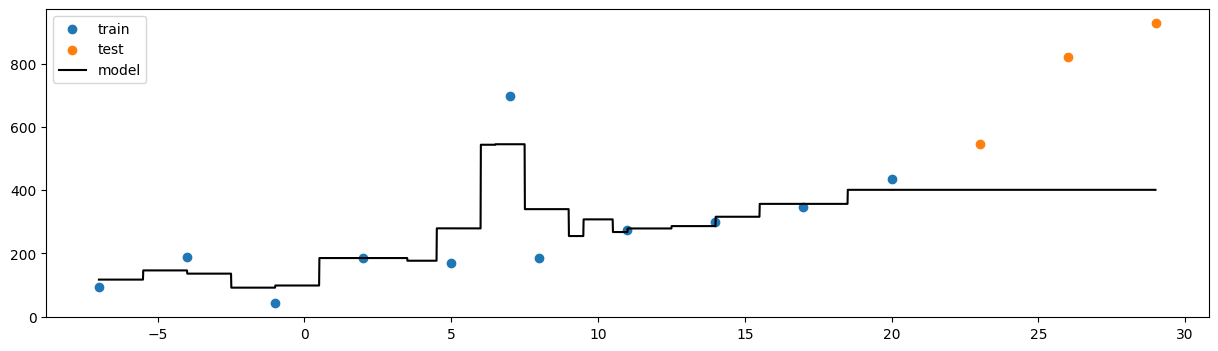

In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
model.fit(X_train,y_train)


y_pred = model.predict(X_test)


plt.figure(figsize=(15,4))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
xi = tf.constant(np.arange(tf.math.reduce_min(X).numpy(), tf.math.reduce_max(X).numpy(), 0.01))
xi = tf.reshape(xi,(-1,1))
y_pred = model.predict(xi)
plt.plot(xi,y_pred, c='k', label = 'model')
plt.legend()
plt.show()

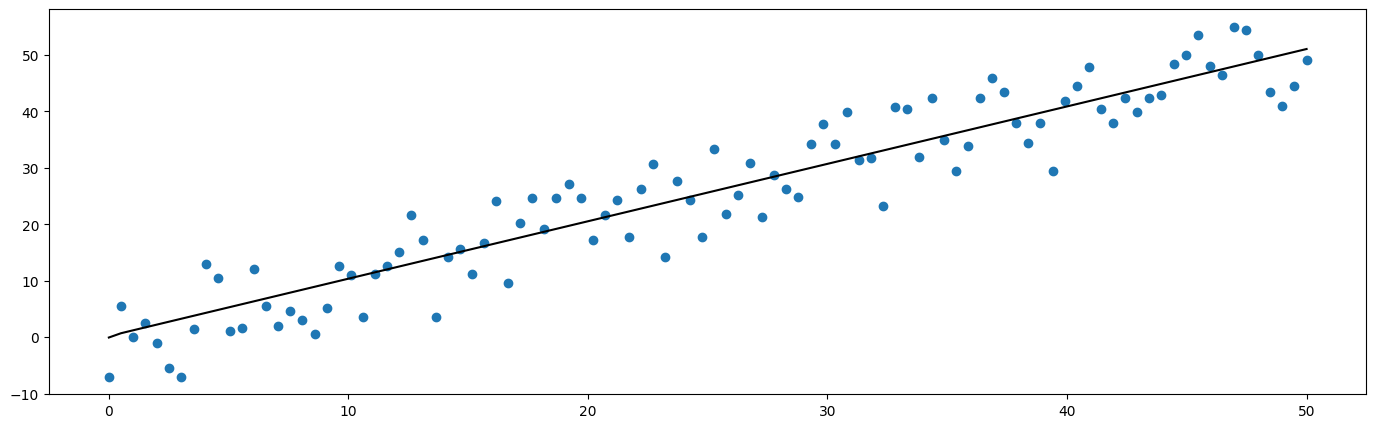

In [50]:
from sklearn.metrics import mean_absolute_error

np.random.seed(20)
X = np.linspace(0,50,100)
X = tf.reshape(X,(-1,1))
y = X + np.random.randint(-10,10,size=(X.shape))

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,input_shape = (1,), activation='linear'),
  tf.keras.layers.Dense(100, activation = 'relu'),
  tf.keras.layers.Dense(1,activation='linear')
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics= ['mse']
              )

model.fit(X,y, epochs=50,verbose=0)
y_pred = model.predict(X, verbose=0)
plt.figure(figsize=(17,5))
plt.scatter(X,y)
plt.plot(X,y_pred,c='k')
plt.show()

### Saving a model:

 * Saved model format
 * HDF5 format

In [68]:
# 1) saved model
model.save('first_model')

# 2) HDF5
model.save('first_model_HDF5.h5')

# 3) keras
model.save('first_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
loaded_model = tf.keras.models.load_model('first_model')
loaded_model.predict([[65]])

1/1 [==============================] - 0s 87ms/step


array([[66.28345]], dtype=float32)

In [66]:
loaded_model = tf.keras.models.load_model('first_model_HDF5.h5')
loaded_model.predict([[65]])

1/1 [==============================] - 0s 153ms/step


array([[66.28345]], dtype=float32)

In [65]:
loaded_model = tf.keras.models.load_model('first_model_HDF5.keras')
loaded_model.predict([[65]])

1/1 [==============================] - 0s 161ms/step


array([[66.28345]], dtype=float32)

In [70]:
# Download to my pc
from google.colab import files
files.download("/content/first_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
# Download to google drive
!cp /content/first_model.keras /content/drive/MyDrive/myModels

In [197]:
data.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [199]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder



,0,1,2,3,4,5,6
0,0.569892,0.666667,0.0,0.257143,1.0,0.0,0.0
1,0.740399,0.333333,0.5,0.414286,1.0,0.0,0.0
2,0.433692,0.000000,0.0,0.271429,0.0,1.0,0.0
3,0.655914,0.000000,0.0,0.642857,0.0,0.0,1.0
4,0.571941,1.000000,0.5,0.714286,0.0,1.0,0.0
...,...,...,...,...,...,...,...
95,0.912442,0.000000,0.0,0.371429,1.0,0.0,0.0
96,0.938044,0.666667,0.5,0.642857,0.0,0.0,1.0
97,0.761393,0.666667,1.0,0.471429,1.0,0.0,0.0
98,0.352791,1.000000,1.0,0.271429,0.0,0.0,1.0


(56915.392946017564, 0.2129439820485799)

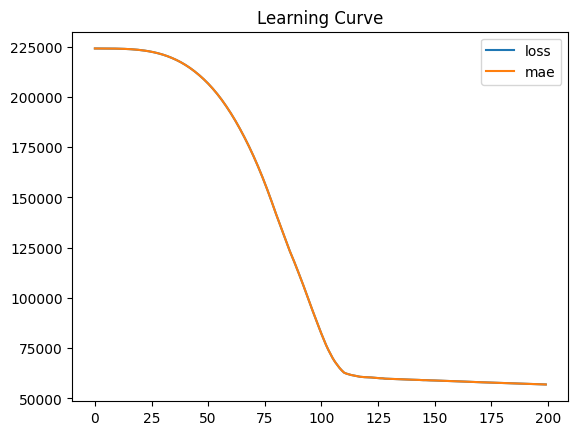

In [201]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


data = pd.read_csv('housing_price_dataset.csv')[:100]
X = data.drop('Price',axis=1)
y = data['Price']

ct = make_column_transformer((MinMaxScaler(), ['SquareFeet','Bedrooms','Bathrooms','YearBuilt']),
 (OneHotEncoder(handle_unknown='ignore'), ['Neighborhood']))

X = ct.fit_transform(X)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400,input_shape = (7,)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(X,y,epochs=200, verbose=0)
y_pred = model.predict(X,verbose=0)

pd.DataFrame(history.history).plot()
plt.title('Learning Curve')
mean_absolute_error(y,y_pred), r2_score(y,y_pred)

In [185]:
model = RandomForestRegressor()


model.fit(X,y)
y_pred = model.predict(X)

mean_absolute_error(y,y_pred), r2_score(y,y_pred)

(17056.903768405355, 0.9324344792001691)

In [186]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators= 100)

model.fit(X,y)
y_pred = model.predict(X)

mean_absolute_error(y,y_pred), r2_score(y,y_pred)

(2.672145198000071, 0.99999999790369)

(50000, 6)